In [1]:
#!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 38.2/38.2 MB 453.3 kB/s eta 0:00:00


165 77760 243 320


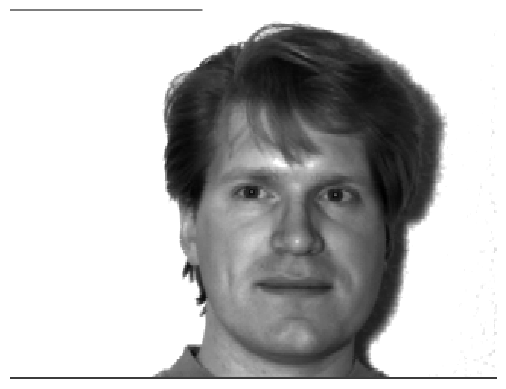

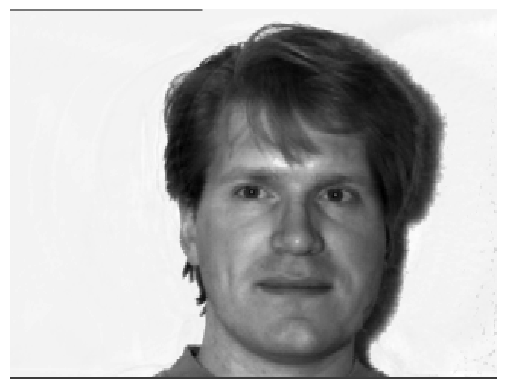

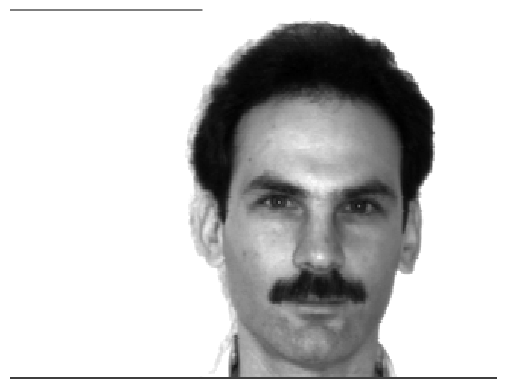

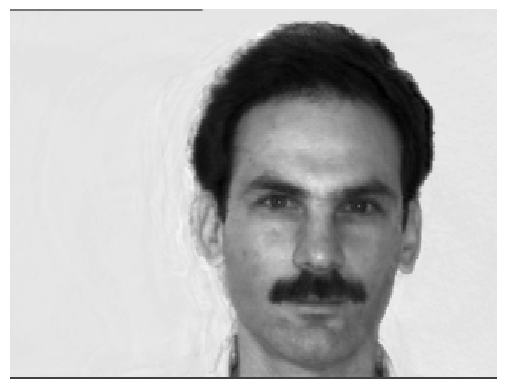

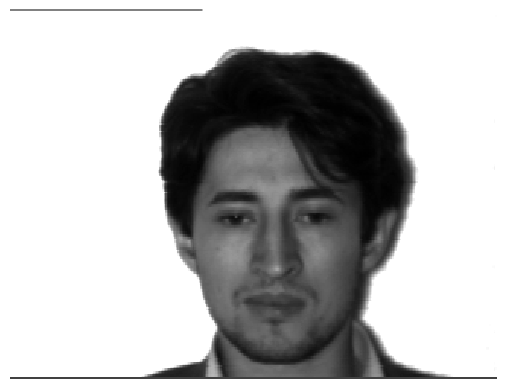

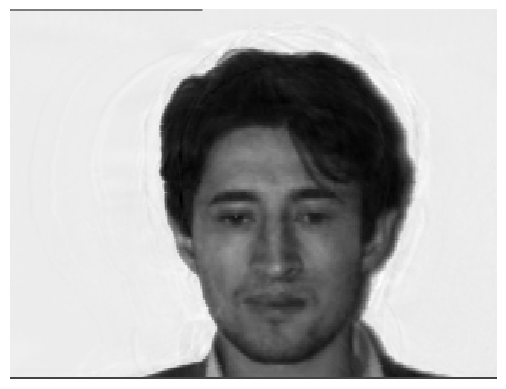

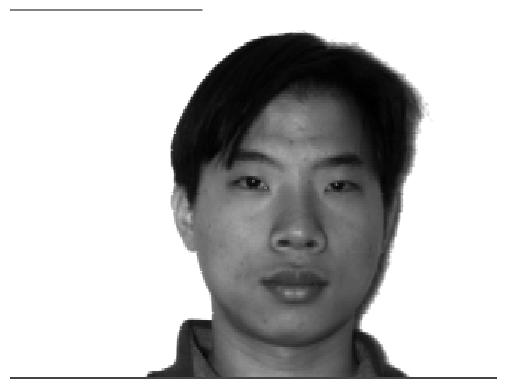

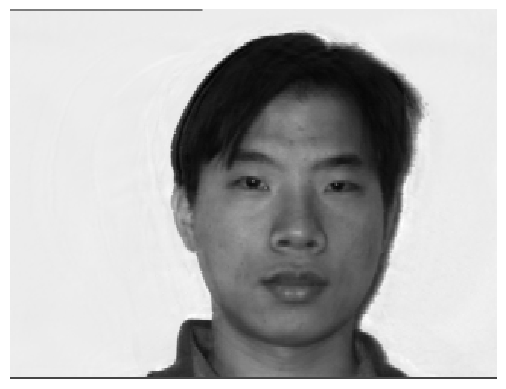

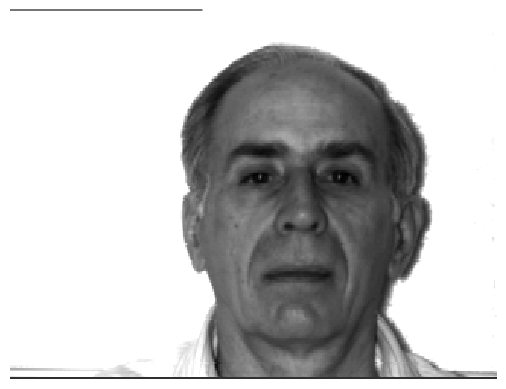

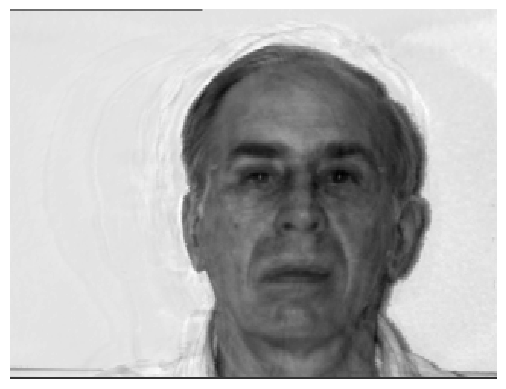

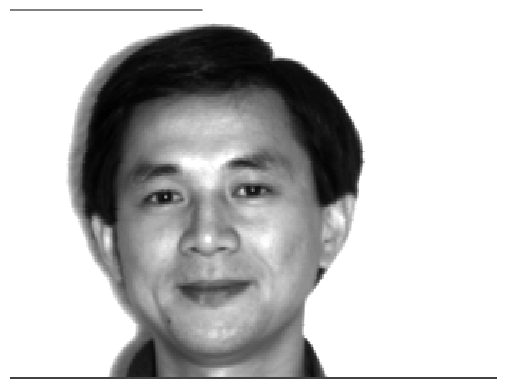

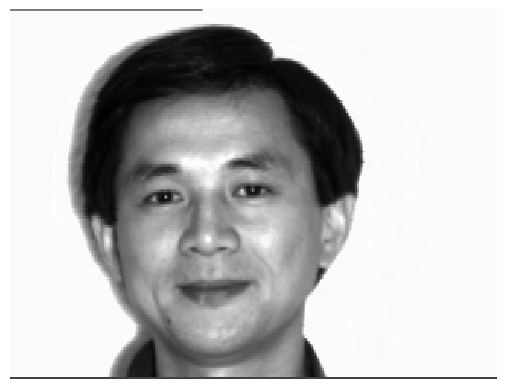

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

# path to the database - change it if needed
path = 'D:\\Teach_n_Train\\Machine Learning\\code\\yale\\yalefaces_data\\' 

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight 
w = im.shape[1] # width

D = h * w
N = len(states)*15 
print(N, D, h, w)

X = np.zeros((D, N))

# collect all data
cnt = 0 

# there are 15 people
for person_id in range(1, 16):
    for state in states:
        
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        
        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        cnt += 1 

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA

# remain dim. k = 125 - change it! 
pca = PCA(n_components=125) 

# then apply to data X
pca.fit(X.T)

# then build projection matrix 
U = pca.components_.T


# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images 
path_save = 'D:\\Teach_n_Train\\Machine Learning\\code\\yale\\yalefaces_data\\data\\results\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons 
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        
        # encode
        z = U.T.dot(x)
        
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()